# Project: Investigating Movie Data 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
I chose the movie dataset since I really love to watch movies. Movies have been advancing year over year due to many factors. We will take a look into the tmdb move data set to explore trends year over year as well as what is popular and how much movies make since the emergence of new technologies.

Few questions I have:
1. Profits change year over year?
2. Are certain genres more popular than the others?
3. Do certain types of movies have longer run times?
4. Does ratings affect the profit the movie makes at the end of the day?

In [69]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

In [70]:
# Load in the movie dataset here using pandas
df = pd.read_csv('tmdb-movies_dataset.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


By using df.head() we want to see what the variables look like, how the rows are divided and what kind of questions we could ask

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

Based on the using the function info we are able to see that we are have 10866 entries. We can see that homepage, tagline, keywords, and production companies are missing a large amount of data. The imdb_id, cast,  director, overview, and genres are missing minimal amounts of data. Looking at the cast we can see that each cast is divided by a '|' same with genres and production companies. We should look to make the 'release date' a date and not an object.

I am guessing that the most missing rows are due to release year of the movie. The older the movie the more likely the movie will have missing rows such as a homepage or taglines. 

In [72]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


I want to see what the minimum values are for release year to see what the oldest movie we could be analyzing

### Cleaning and Restructuring Movie Data

Lets clean a bit here. 
1. Change release_date to a date format
2. Change genre column to find averages (must create a separate dateframe specifically for genre analysis)
3. Drop rows with missing values
4. Create a new column to figure out the gross profit per movie
5. Insert median revenue and median budget into missing value rows for those columns

In [73]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
# Insert median values for missing cells in revenue_adj and budget_adj (found on stackoverflow)
med_rev_adj = df.query('revenue_adj > 0')['revenue_adj'].median()
med_budg_adj = df.query('budget_adj > 0')['budget_adj'].median()
df['revenue_adj']=df['revenue_adj'].replace(0,med_rev_adj)
df['budget_adj']=df['budget_adj'].replace(0,med_budg_adj)


In [74]:
# Calculate out an adj_gross_profit
df['adj_gross_profit'] = df['revenue_adj'] - df['budget_adj']
df['release_date'] =  pd.to_datetime(df['release_date'])
# Dropping these columns so we drop as minimum NA rows as possible
df = df.drop('homepage', axis = 1)
df = df.drop('tagline', axis = 1)
df = df.drop('keywords', axis = 1)

# Drop na values
df = df.dropna()
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,adj_gross_profit
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09


In [75]:
# Checking our dataset on the tail spectrum
df.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,adj_gross_profit
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,2066-06-15,11,7.4,1966,2.272271e+07,4.392749e+07,2.120478e+07
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,2066-12-21,20,5.7,1966,2.272271e+07,4.392749e+07,2.120478e+07
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,2066-01-01,11,6.5,1966,2.272271e+07,4.392749e+07,2.120478e+07
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,2066-11-02,22,5.4,1966,2.272271e+07,4.392749e+07,2.120478e+07
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,Harold P. Warren,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,2066-11-15,15,1.5,1966,1.276423e+05,4.392749e+07,4.379984e+07


In [76]:
# Checking for missing values and entry count
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9771 entries, 0 to 10865
Data columns (total 19 columns):
id                      9771 non-null int64
imdb_id                 9771 non-null object
popularity              9771 non-null float64
budget                  9771 non-null int64
revenue                 9771 non-null int64
original_title          9771 non-null object
cast                    9771 non-null object
director                9771 non-null object
overview                9771 non-null object
runtime                 9771 non-null int64
genres                  9771 non-null object
production_companies    9771 non-null object
release_date            9771 non-null datetime64[ns]
vote_count              9771 non-null int64
vote_average            9771 non-null float64
release_year            9771 non-null int64
budget_adj              9771 non-null float64
revenue_adj             9771 non-null float64
adj_gross_profit        9771 non-null float64
dtypes: datetime64[ns](1), flo

This is to see how many rows we lost from deleting out the variables and dropping rows that are unnecessary for this analysis

In [77]:
# Check for duplicate values and drop
sum(df.duplicated())

1

In [78]:
df.drop_duplicates(inplace=True)

In [79]:
sum(df.duplicated())

0

In [80]:
# Create a 2015 dataframe
df_2015 = df.query('release_year == 2015')

In [81]:
df_2015.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558 entries, 0 to 625
Data columns (total 19 columns):
id                      558 non-null int64
imdb_id                 558 non-null object
popularity              558 non-null float64
budget                  558 non-null int64
revenue                 558 non-null int64
original_title          558 non-null object
cast                    558 non-null object
director                558 non-null object
overview                558 non-null object
runtime                 558 non-null int64
genres                  558 non-null object
production_companies    558 non-null object
release_date            558 non-null datetime64[ns]
vote_count              558 non-null int64
vote_average            558 non-null float64
release_year            558 non-null int64
budget_adj              558 non-null float64
revenue_adj             558 non-null float64
adj_gross_profit        558 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(6), obj

We made a 2015 data set to answer a question

<a id='eda'></a>
## Exploratory Data Analysis



### What was the average profit a movie made per year in 80s - 21st century?

In [82]:
# Create a 1980s-2015 dataframe
df_80s =  df.query('release_year >= 1980')

In [83]:
df_mean_profit = df_80s.groupby('release_year')['adj_gross_profit'].mean().reset_index()
df_mean_profit.head()

,release_year,adj_gross_profit
0,1980,5.835532e+07
1,1981,5.476850e+07
2,1982,6.625652e+07
3,1983,5.392917e+07
4,1984,5.050073e+07


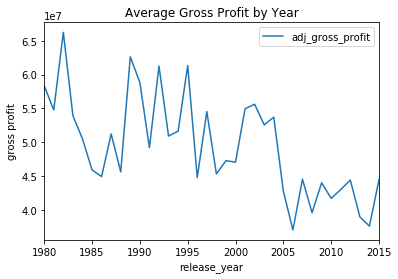

In [84]:
df_mean_profit.plot('release_year', 'adj_gross_profit', title = 'Average Gross Profit by Year', kind='line')
plt.ylabel('gross profit');

Based on this table we can see year profits year over year fluctuate, but has been trending down.

### What was the highest trending genres in the year 2015?

In [85]:
# Found on stack overflow so we can segment this dataframe and run the split column method we learned in earlier lessons
a = df['genres']
df_2015['count_delimiter'] = a.str.count('\|')

df_2015['count_delimiter'].describe()


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


count    558.000000
mean       1.243728
std        1.029941
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: count_delimiter, dtype: float64

I used the functions above to see what the max and minimum number of '|' were in the genres column

In [86]:
# Found on stackoverflow
df_2015 = df_2015[df_2015['genres'].str.contains('|')]
df_2015.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,adj_gross_profit,count_delimiter
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,3
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08,3
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08,2
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09,3
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09,2


In [87]:
# Created this function to break out the multiple genres into separate columns (like a text to columns)
def separate(data):
    return data.str[0:].str.split('|',expand = True)

genretest = separate(df_2015['genres'])
genretest = genretest.rename(columns = {0: "genre1", 
                                  1: "genre2", 
                                  2: "genre3",
                                  3: "genre4",
                                  4: "genre5"})
genretest.head()

,genre1,genre2,genre3,genre4,genre5
0,Action,Adventure,Science Fiction,Thriller,None
1,Action,Adventure,Science Fiction,Thriller,None
2,Adventure,Science Fiction,Thriller,None,None
3,Action,Adventure,Science Fiction,Fantasy,None
4,Action,Crime,Thriller,None,None


In [88]:
df_2015new = df_2015.join(genretest)
df_2015new.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,...,release_year,budget_adj,revenue_adj,adj_gross_profit,count_delimiter,genre1,genre2,genre3,genre4,genre5
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,...,2015,1.379999e+08,1.392446e+09,1.254446e+09,3,Action,Adventure,Science Fiction,Thriller,None
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,...,2015,1.379999e+08,3.481613e+08,2.101614e+08,3,Action,Adventure,Science Fiction,Thriller,None
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,...,2015,1.012000e+08,2.716190e+08,1.704191e+08,2,Adventure,Science Fiction,Thriller,None,None
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,...,2015,1.839999e+08,1.902723e+09,1.718723e+09,3,Action,Adventure,Science Fiction,Fantasy,None
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,...,2015,1.747999e+08,1.385749e+09,1.210949e+09,2,Action,Crime,Thriller,None,None


In [89]:
#Created new dataframes to append the genre list on the new column Main_Genre then dropped the none values at the end
df1 = df_2015new.drop(['genre2','genre3','genre4','genre5'], 1)
df2 = df_2015new.drop(['genre1','genre3','genre4','genre5'], 1)
df3 = df_2015new.drop(['genre1','genre2','genre4','genre5'], 1)
df4 = df_2015new.drop(['genre1','genre2','genre3','genre5'], 1)
df5 = df_2015new.drop(['genre1','genre2','genre3','genre4'], 1)

df1 = df1.rename(columns = {"genre1": "Main_Genre"})
df2 = df2.rename(columns = {"genre2": "Main_Genre"})
df3 = df3.rename(columns = {"genre3": "Main_Genre"})
df4 = df4.rename(columns = {"genre4": "Main_Genre"})
df5 = df5.rename(columns = {"genre5": "Main_Genre"})

newrow = df1.append(df2)
newrow = newrow.append(df3)
newrow = newrow.append(df4)
newrow = newrow.append(df5)

newrow = newrow.dropna()
newrow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1252 entries, 0 to 216
Data columns (total 21 columns):
id                      1252 non-null int64
imdb_id                 1252 non-null object
popularity              1252 non-null float64
budget                  1252 non-null int64
revenue                 1252 non-null int64
original_title          1252 non-null object
cast                    1252 non-null object
director                1252 non-null object
overview                1252 non-null object
runtime                 1252 non-null int64
genres                  1252 non-null object
production_companies    1252 non-null object
release_date            1252 non-null datetime64[ns]
vote_count              1252 non-null int64
vote_average            1252 non-null float64
release_year            1252 non-null int64
budget_adj              1252 non-null float64
revenue_adj             1252 non-null float64
adj_gross_profit        1252 non-null float64
count_delimiter         1252 non

After we appended all the rows we can see that we have 1252 data points for our genre analysis

In [90]:
newrow.sort_values(by=['id'])

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,...,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,adj_gross_profit,count_delimiter,Main_Genre
186,10317,tt1018765,0.795762,28000000,7002261,Our Brand Is Crisis,Sandra Bullock|Anthony Mackie|Billy Bob Thornt...,David Gordon Green,"A feature film based on the documentary ""Our B...",108,...,Participant Media|Smokehouse Pictures,2015-09-11,122,5.7,2015,2.575999e+07,6.442077e+06,-1.931791e+07,1,Comedy
186,10317,tt1018765,0.795762,28000000,7002261,Our Brand Is Crisis,Sandra Bullock|Anthony Mackie|Billy Bob Thornt...,David Gordon Green,"A feature film based on the documentary ""Our B...",108,...,Participant Media|Smokehouse Pictures,2015-09-11,122,5.7,2015,2.575999e+07,6.442077e+06,-1.931791e+07,1,Drama
325,57876,tt1519461,0.369529,5000000,0,Area 51,Reid Warner|Darrin Bragg|Ben Rovner|Jelena Nik...,Oren Peli,Three young conspiracy theorists attempt to un...,91,...,Insurge Pictures,2015-05-15,82,4.4,2015,4.599998e+06,4.392749e+07,3.932749e+07,2,Science Fiction
325,57876,tt1519461,0.369529,5000000,0,Area 51,Reid Warner|Darrin Bragg|Ben Rovner|Jelena Nik...,Oren Peli,Three young conspiracy theorists attempt to un...,91,...,Insurge Pictures,2015-05-15,82,4.4,2015,4.599998e+06,4.392749e+07,3.932749e+07,2,Horror
325,57876,tt1519461,0.369529,5000000,0,Area 51,Reid Warner|Darrin Bragg|Ben Rovner|Jelena Nik...,Oren Peli,Three young conspiracy theorists attempt to un...,91,...,Insurge Pictures,2015-05-15,82,4.4,2015,4.599998e+06,4.392749e+07,3.932749e+07,2,Thriller
488,75861,tt1850418,0.253949,3400000,0,To Write Love on Her Arms,Kat Dennings|Chad Michael Murray|Rupert Friend...,Nathan Frankowski,The story follows 19-year-old Renee who has al...,118,...,Two Streets Entertainment|Birchwood Pictures|N...,2015-03-13,32,6.9,2015,3.127999e+06,4.392749e+07,4.079949e+07,1,Drama
488,75861,tt1850418,0.253949,3400000,0,To Write Love on Her Arms,Kat Dennings|Chad Michael Murray|Rupert Friend...,Nathan Frankowski,The story follows 19-year-old Renee who has al...,118,...,Two Streets Entertainment|Birchwood Pictures|N...,2015-03-13,32,6.9,2015,3.127999e+06,4.392749e+07,4.079949e+07,1,Music
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,...,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08,3,Action
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,...,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08,3,Science Fiction
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,...,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08,3,Thriller


We sorted values here so that we can QA the rows and see that we have made duplicates of them based on the number of genres associated to them. This way we can bucket a movie into multiple genres.

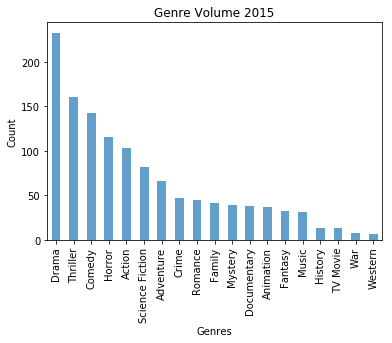

In [91]:
# Look at volume of titles in each genre to see whats most popular
newrow.pivot_table(index = 'Main_Genre', aggfunc = 'size').sort_values(ascending = False).plot(kind='bar', title = "Genre Volume 2015", alpha = 0.7)
plt.xlabel('Genres')
plt.ylabel('Count');

It looks as is Drama is the most popular movie genre in the year 2015. Western and War movies look to not be as popular in 2015

### What was the average movie runtime per genre 2015?

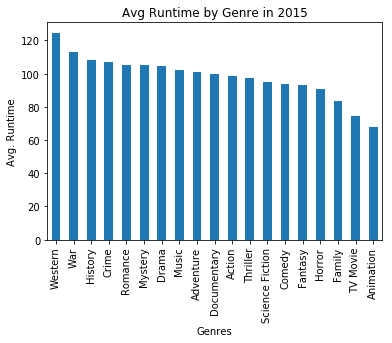

In [92]:
# Create bar chart to see what the average movie runtime is per genre in 2015
newrow.groupby('Main_Genre')['runtime'].mean().sort_values(ascending = False).plot(kind = 'bar', title = 'Avg Runtime by Genre in 2015')
plt.xlabel('Genres')
plt.ylabel('Avg. Runtime');

Western movies look to have the longest average run time. Animations are the shortest. 

In [93]:
newrow.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,adj_gross_profit,count_delimiter
count,1252.000000,1252.000000,1.252000e+03,1.252000e+03,1252.000000,1252.000000,1252.000000,1252.0,1.252000e+03,1.252000e+03,1.252000e+03,1252.000000
mean,287705.307508,1.413758,1.838142e+07,6.561915e+07,97.511981,416.205272,5.857668,2015.0,3.028680e+07,8.626295e+07,5.597615e+07,1.715655
std,63449.604040,2.945139,4.198648e+07,2.166936e+08,23.472977,885.974861,1.036850,0.0,3.412404e+07,1.925671e+08,1.684147e+08,1.029063
min,10317.000000,0.017050,0.000000e+00,0.000000e+00,0.000000,10.000000,2.400000,2015.0,9.199996e+00,4.088478e+03,-4.806727e+07,0.000000
25%,257088.000000,0.265010,0.000000e+00,0.000000e+00,88.000000,22.000000,5.200000,2015.0,2.272271e+07,4.392749e+07,2.120478e+07,1.000000
50%,301728.000000,0.486351,0.000000e+00,0.000000e+00,96.000000,69.000000,5.900000,2015.0,2.272271e+07,4.392749e+07,2.120478e+07,2.000000
75%,330544.000000,1.380320,1.200000e+07,2.235457e+07,110.000000,341.000000,6.600000,2015.0,2.272271e+07,4.392749e+07,2.648895e+07,2.000000
max,395883.000000,32.985763,2.800000e+08,2.068178e+09,240.000000,6185.000000,8.400000,2015.0,2.575999e+08,1.902723e+09,1.718723e+09,4.000000


### Is there a relationship between Vote Rating and Adjusted Profit

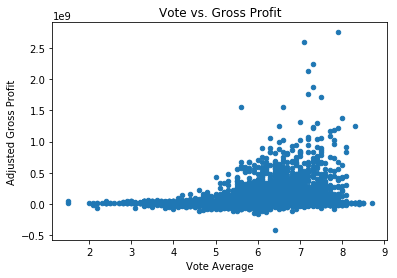

In [94]:
# Plot the vote average to adj gross profit
df.plot('vote_average', 'adj_gross_profit', kind = 'scatter', title = 'Vote vs. Gross Profit')
plt.xlabel('Vote Average')
plt.ylabel('Adjusted Gross Profit');

It looks like there seems to be some type of relationship between the vote_average and the amount of gross profit made on a movie. It would make sense that a movie rated higher would bring in more money since people are persuaded by reviews to see a movie.

# Conclusion
## Final Thoughts
1. Adjusted gross profit made on movies looks like it is trending down from 1980-2015
2. Dramas look to be the most popular movie genre in the year 2015
3. Western movies look to have the longest run time with greater than 120 minutes on average
4. There looks to be some type of relationship with the vote average vs the adjusted gross profit. We could potentially run some type of regression analysis to predict adj gross profit based on vote average

## Limitations
1. As we continued to explore the data there were a lot of missing cells such as revenue and budget which had to be replaced by the medians of the variable
2. Casts and Genres had multiple categories associated in them which made it difficult to analyze without breaking them out into their own rows
3. Noticed some of the release date was formatted strangely which also makes it difficult to do any day over day analysis. If I did day over day analysis I would create a function to break out the dates separately by year day and month and then concatenate a new date with the correct year


In [95]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0